In [9]:
#Importamos las librerias 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [10]:
#Cargamos el dataset y mostramos las 5 primeras filas
data = pd.read_csv("C:/Users/pemoj/OneDrive/Escritorio/UNAD ING SIS/2024 II/ANALISIS DE DATOS/Tarea 3/Anexo 4 - Dataset Red Wine Quality/winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [13]:
# Dimensiones del conjunto de datos
data.shape

(1599, 12)

In [15]:
# Estadística descriptiva
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [17]:
# Revisión de valores nulos
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


Histogramas para cada característica:


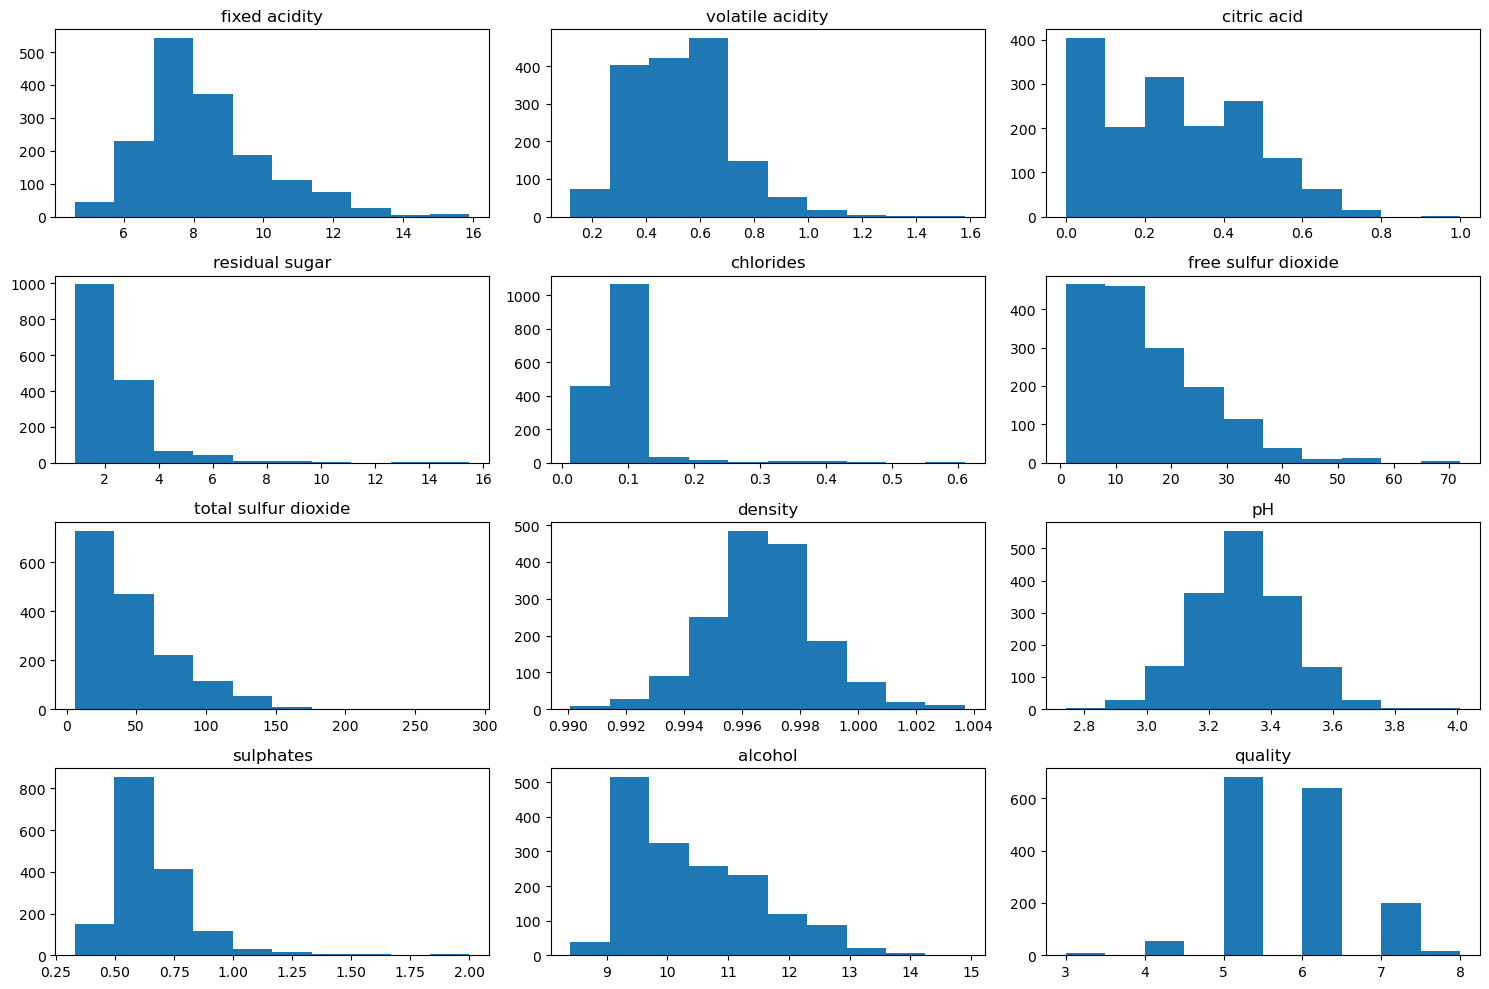

In [19]:
# Histogramas para cada característica para visualizar las distribuciones
print("\nHistogramas para cada característica:")
data.hist(bins=10, figsize=(15, 10), grid=False)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Diagrama de dispersión ALCOHOL y PH')

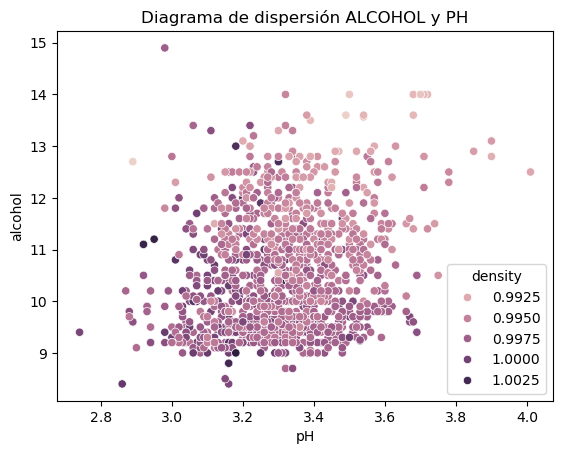

In [27]:
sns.scatterplot(x = "pH", y = "alcohol", hue = "density", data = data)
plt.title("Diagrama de dispersión ALCOHOL y PH")


Diagramas de caja para cada característica:


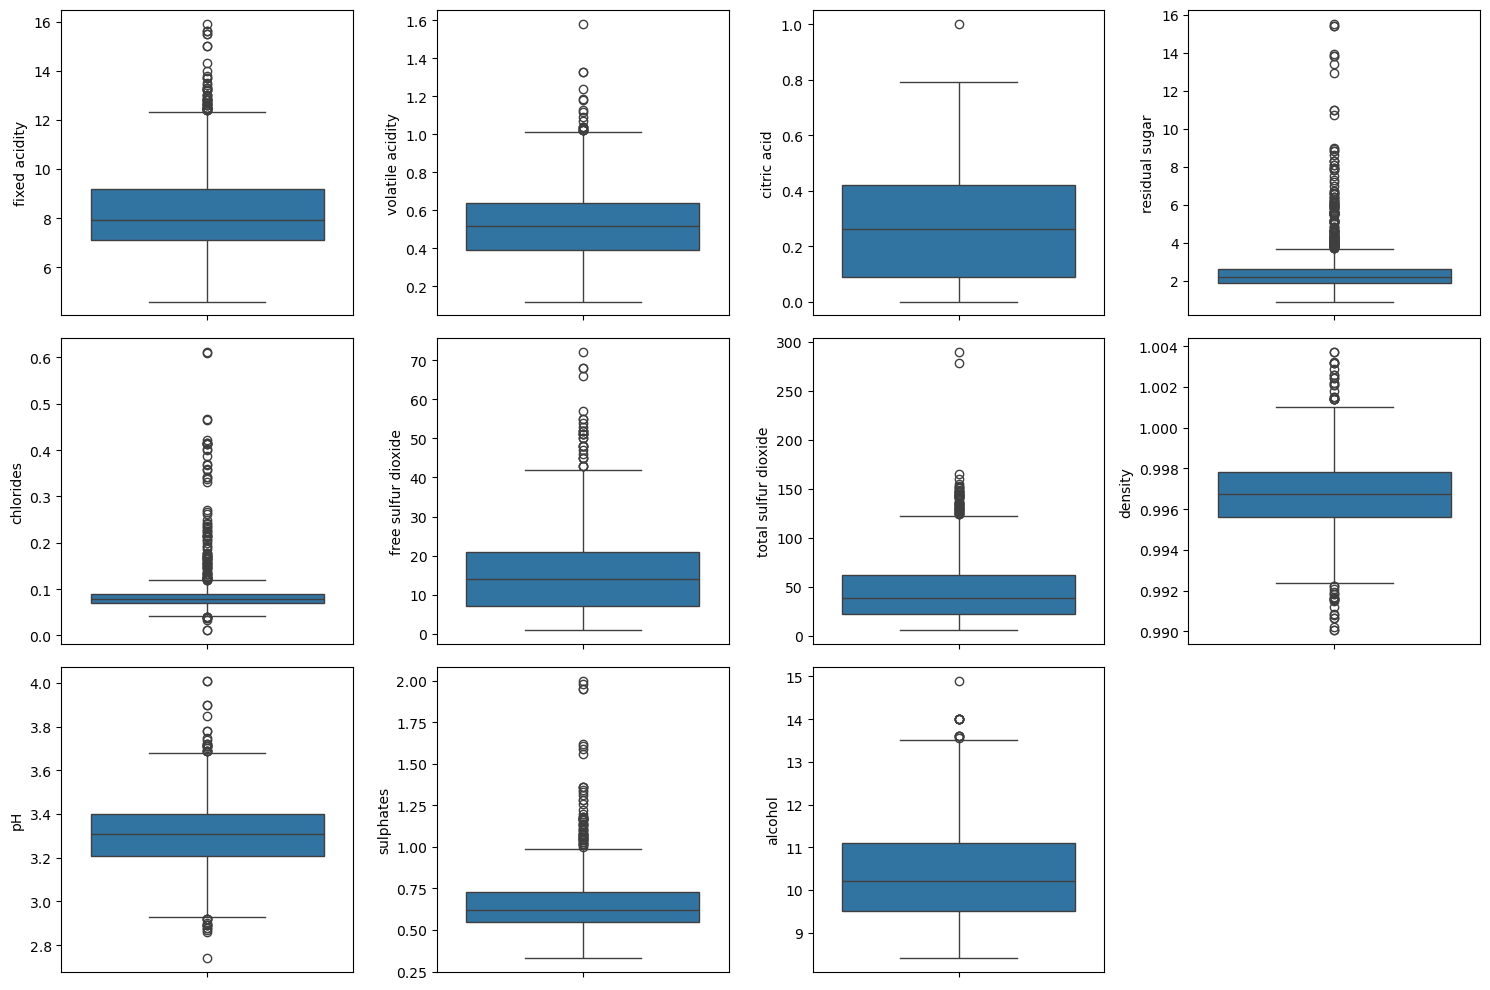

In [32]:
# Diagramas de caja para identificar valores atípicos
print("\nDiagramas de caja para cada característica:")
plt.figure(figsize=(15, 10))
for index, column in enumerate(data.columns[:-1]):  # Excluir la columna 'quality'
    plt.subplot(3, 4, index + 1)
    sns.boxplot(y=column, data=data)
plt.tight_layout()
plt.show()


Mapa de calor de las correlaciones entre variables:


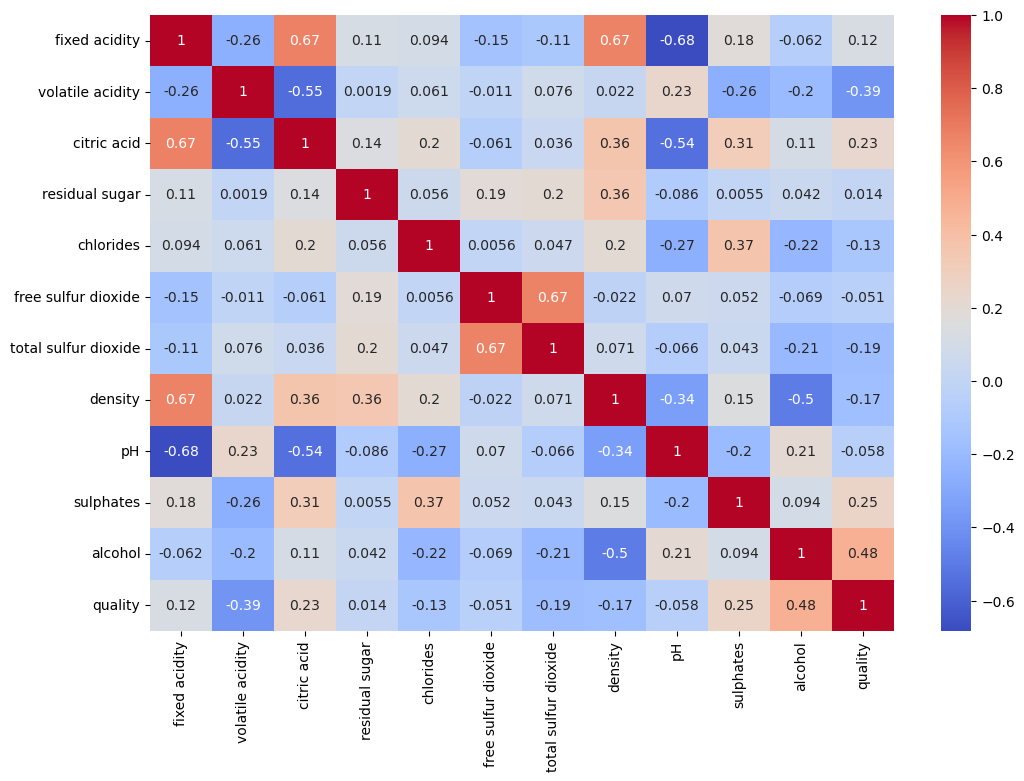

In [38]:
# Mapa de calor para las correlaciones entre variables
print("\nMapa de calor de las correlaciones entre variables:")
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [52]:
predictors_col = ["alcohol", "sulphates", "volatile acidity", "total sulfur dioxide"]
target_col = ['alcohol']

In [54]:
predictors = data[predictors_col]
target = data[target_col]

In [56]:
predictors

,alcohol,sulphates,volatile acidity,total sulfur dioxide
0,9.4,0.56,0.700,34.0
1,9.8,0.68,0.880,67.0
2,9.8,0.65,0.760,54.0
3,9.8,0.58,0.280,60.0
4,9.4,0.56,0.700,34.0
...,...,...,...,...
1594,10.5,0.58,0.600,44.0
1595,11.2,0.76,0.550,51.0
1596,11.0,0.75,0.510,40.0
1597,10.2,0.71,0.645,44.0


In [58]:
target

,alcohol
0,9.4
1,9.8
2,9.8
3,9.8
4,9.4
...,...
1594,10.5
1595,11.2
1596,11.0
1597,10.2


In [60]:
corr = predictors.corr()
corr

,alcohol,sulphates,volatile acidity,total sulfur dioxide
alcohol,1.000000,0.093595,-0.202288,-0.205654
sulphates,0.093595,1.000000,-0.260987,0.042947
volatile acidity,-0.202288,-0.260987,1.000000,0.076470
total sulfur dioxide,-0.205654,0.042947,0.076470,1.000000


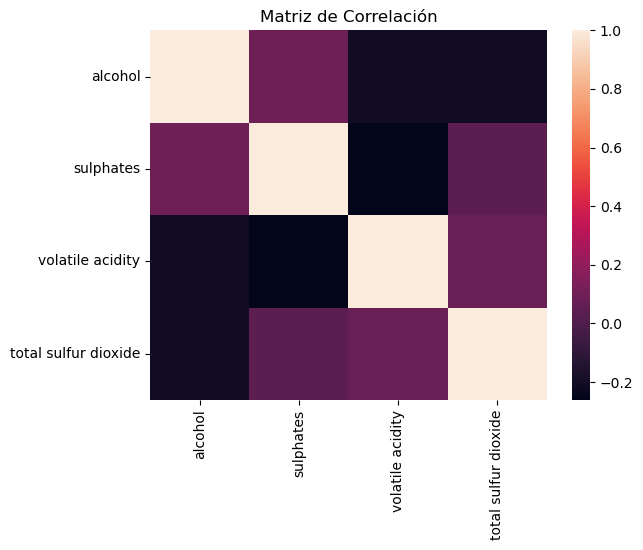

In [62]:
sns.heatmap(corr)
plt.title('Matriz de Correlación')
plt.show()

In [71]:
# Paso 3: Selección de Características

# Preparar los datos para la selección de características
X = data.drop('quality', axis=1)  # Características
y = data['quality']  # Variable objetivo

In [73]:
# Entrenar un árbol de decisión para obtener la relevancia de las características
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X, y)

DecisionTreeClassifier()

In [87]:
# Obtener la relevancia de las características y ordenarlas
feature_importances = pd.DataFrame(tree_clf.feature_importances_,
                                   index=X.columns,
                                   columns=['relevance']).sort_values('relevance', ascending=False)

print("Relevancia de las características:")
print(feature_importances)

Relevancia de las características:
                      relevance
alcohol                0.180214
sulphates              0.117626
total sulfur dioxide   0.112816
volatile acidity       0.096329
residual sugar         0.088621
pH                     0.080732
fixed acidity          0.072694
density                0.072454
citric acid            0.065053
chlorides              0.063586
free sulfur dioxide    0.049876


In [89]:
# Seleccionar las características más relevante según el criterio elegido el cual es 0.05 para este caso
selected_features = feature_importances[feature_importances['relevance'] > 0.03].index
print("\nCaracterísticas seleccionadas:")
print(selected_features)


Características seleccionadas:
Index(['alcohol', 'sulphates', 'total sulfur dioxide', 'volatile acidity',
       'residual sugar', 'pH', 'fixed acidity', 'density', 'citric acid',
       'chlorides', 'free sulfur dioxide'],
      dtype='object')


In [91]:
# Ahora, se crea un nuevo DataFrame con las características seleccionadas para el respectivo analisis
X_selected = X[selected_features]
print("\nPrimeras filas con características seleccionadas:")
print(X_selected.head())


Primeras filas con características seleccionadas:
   alcohol  sulphates  total sulfur dioxide  volatile acidity  residual sugar  \
0      9.4       0.56                  34.0              0.70             1.9   
1      9.8       0.68                  67.0              0.88             2.6   
2      9.8       0.65                  54.0              0.76             2.3   
3      9.8       0.58                  60.0              0.28             1.9   
4      9.4       0.56                  34.0              0.70             1.9   

     pH  fixed acidity  density  citric acid  chlorides  free sulfur dioxide  
0  3.51            7.4   0.9978         0.00      0.076                 11.0  
1  3.20            7.8   0.9968         0.00      0.098                 25.0  
2  3.26            7.8   0.9970         0.04      0.092                 15.0  
3  3.16           11.2   0.9980         0.56      0.075                 17.0  
4  3.51            7.4   0.9978         0.00      0.076            

In [93]:
#4 Dividir los datos en entrenamiento y prueba usando las características seleccionadas y el objetivo
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=13)

In [95]:
tree = DecisionTreeClassifier()

In [97]:
arbol = tree.fit(X_train, y_train)

[Text(0.5227456698890748, 0.9772727272727273, 'x[0] <= 10.525\ngini = 0.646\nsamples = 1279\nvalue = [9.0, 45.0, 535.0, 514.0, 164.0, 12.0]'),
 Text(0.2445621862799777, 0.9318181818181818, 'x[1] <= 0.535\ngini = 0.546\nsamples = 774\nvalue = [6, 29, 450, 260, 29, 0]'),
 Text(0.04251099956621429, 0.8863636363636364, 'x[3] <= 0.335\ngini = 0.367\nsamples = 183\nvalue = [2, 13, 143, 24, 1, 0]'),
 Text(0.015864163103426906, 0.8409090909090909, 'x[9] <= 0.082\ngini = 0.562\nsamples = 11\nvalue = [0, 1, 4, 6, 0, 0]'),
 Text(0.01189812232757018, 0.7954545454545454, 'x[9] <= 0.059\ngini = 0.406\nsamples = 8\nvalue = [0, 1, 1, 6, 0, 0]'),
 Text(0.007932081551713453, 0.75, 'x[0] <= 9.4\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1, 0, 0, 0]'),
 Text(0.003966040775856727, 0.7045454545454546, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0, 0, 0]'),
 Text(0.01189812232757018, 0.7045454545454546, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0, 0]'),
 Text(0.015864163103426906, 0.75, 'gini = 0.0\nsampl

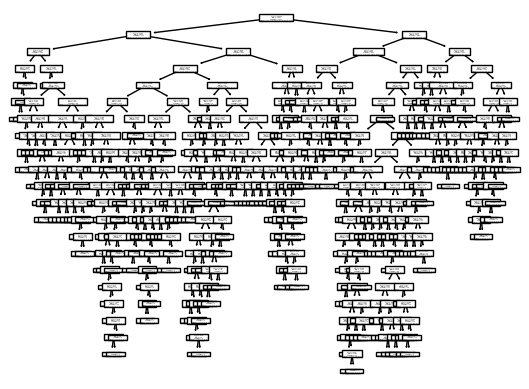

In [99]:
plot_tree(arbol)

In [101]:
# 5 Entrenar el Modelo
from sklearn.tree import DecisionTreeClassifier

# Inicializar el modelo de árbol de decisión con hiperparámetros específicos
# Los hiperparámetros se ajustan para obtener el mejor rendimiento posible
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=13)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=13)

[Text(0.5227456698890748, 0.9772727272727273, 'x[0] <= 10.525\ngini = 0.646\nsamples = 1279\nvalue = [9.0, 45.0, 535.0, 514.0, 164.0, 12.0]'),
 Text(0.2445621862799777, 0.9318181818181818, 'x[1] <= 0.535\ngini = 0.546\nsamples = 774\nvalue = [6, 29, 450, 260, 29, 0]'),
 Text(0.04251099956621429, 0.8863636363636364, 'x[3] <= 0.335\ngini = 0.367\nsamples = 183\nvalue = [2, 13, 143, 24, 1, 0]'),
 Text(0.015864163103426906, 0.8409090909090909, 'x[9] <= 0.082\ngini = 0.562\nsamples = 11\nvalue = [0, 1, 4, 6, 0, 0]'),
 Text(0.01189812232757018, 0.7954545454545454, 'x[9] <= 0.059\ngini = 0.406\nsamples = 8\nvalue = [0, 1, 1, 6, 0, 0]'),
 Text(0.007932081551713453, 0.75, 'x[0] <= 9.4\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1, 0, 0, 0]'),
 Text(0.003966040775856727, 0.7045454545454546, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0, 0, 0]'),
 Text(0.01189812232757018, 0.7045454545454546, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0, 0]'),
 Text(0.015864163103426906, 0.75, 'gini = 0.0\nsampl

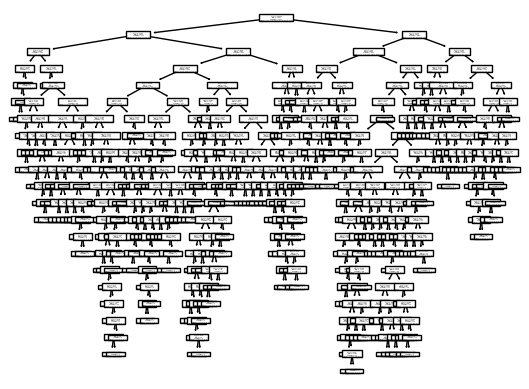

In [103]:
plot_tree(arbol)

In [111]:
predicciones = arbol.predict(X_test)

In [113]:
predicciones

array([7, 5, 5, 5, 6, 5, 5, 8, 5, 5, 5, 6, 5, 6, 7, 5, 6, 7, 5, 7, 5, 6,
       7, 5, 6, 5, 5, 6, 6, 6, 6, 5, 5, 6, 5, 6, 5, 5, 6, 7, 6, 5, 6, 6,
       6, 5, 6, 5, 5, 6, 6, 4, 6, 5, 7, 5, 5, 6, 6, 5, 6, 5, 5, 5, 7, 7,
       6, 7, 5, 3, 6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6, 6, 6, 5, 5, 5, 6, 5,
       7, 5, 6, 6, 8, 7, 5, 6, 5, 6, 6, 6, 5, 7, 6, 5, 6, 6, 6, 6, 5, 7,
       7, 7, 6, 6, 6, 5, 6, 7, 5, 5, 7, 5, 5, 6, 5, 6, 5, 5, 6, 7, 6, 5,
       6, 7, 5, 5, 7, 5, 6, 7, 6, 5, 6, 6, 6, 4, 6, 5, 6, 5, 5, 6, 5, 5,
       5, 5, 5, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 5, 5, 5, 5, 6, 6,
       5, 5, 5, 5, 5, 6, 6, 6, 5, 5, 6, 6, 5, 5, 5, 6, 5, 5, 7, 5, 6, 7,
       5, 5, 6, 6, 7, 5, 6, 6, 6, 5, 5, 6, 7, 5, 6, 6, 7, 5, 5, 5, 6, 7,
       5, 5, 6, 5, 6, 6, 5, 6, 4, 7, 6, 6, 5, 5, 5, 6, 6, 5, 5, 5, 5, 6,
       6, 6, 5, 6, 8, 5, 5, 6, 6, 6, 5, 5, 6, 6, 6, 7, 5, 5, 5, 6, 7, 5,
       6, 5, 6, 7, 6, 5, 5, 5, 6, 5, 6, 5, 6, 6, 5, 5, 4, 4, 6, 5, 7, 5,
       6, 7, 5, 5, 5, 6, 5, 7, 5, 6, 6, 5, 5, 5, 5,

In [115]:
#6 Evalua el Desempeño del Modelo
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [117]:
# Predicciones en el conjunto de prueba
y_pred = tree_clf.predict(X_test)

In [119]:
# Cálculo de métricas de rendimiento
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.528125
Recall: 0.528125
F1 Score: 0.4825319580649932


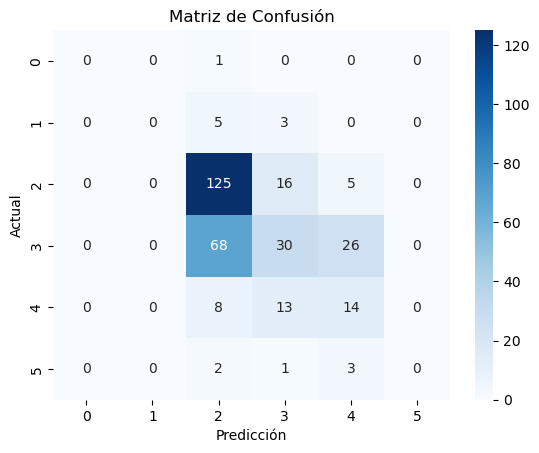

In [123]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(y_test, y_pred)

# Visualización de la matriz de confusión con Seaborn
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicción')
plt.title('Matriz de Confusión')
plt.show()

In [127]:
accuracy = accuracy_score(y_test,predicciones)
accuracy

0.634375